<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>Introduction to DP0.3 -- Part 2?</b> <br>
Contact author(s): Bob Abel and Douglas Tucker<br>
Last verified to run: 2023-07-09 <br>
LSST Science Piplines version: Weekly 2023_21 <br>
Container size: medium <br>
Targeted learning level: beginner <br>

## 1. Albedo and diameters

TBD. Reference the first one.

### 1.1 Package Imports

Import general python packages and the Rubin TAP service utilities.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.patches import Rectangle
import pandas as pd

from lsst.rsp import get_tap_service, retrieve_query

### 1.2 Define Functions and Parameters

Here, we define a function, `estDistFromHandAlbedo`, which estimates the diameter (in km) of an solar system object based on its solar system absolute magnitude, `H`, and its geometric albedo, `a`.  It assumes a spherical body and is just a rough estimate.  We will use it later.

We obtained this function from https://cneos.jpl.nasa.gov/tools/ast_size_est.html, where the diameter is estimated using the equation `estDiam` = $10^{[3.1236 - 0.5log_{10}a - 0.2H]}$.

In [ ]:
def estDiamFromHandAlbedo(H, a=0.15):
    import numpy as np
    estDiam = np.power(10., 3.1236 - 0.5*np.log10(a) - 0.2*H)
    return estDiam

Now let's estimate the diameters of these solar system objects.  We can do this by making use of the solar system absolute magnitudes, or `H` magnitudes, for these objects, by making a reasonable assumption for their geometric albedos, `a`, and by employing the function `estDiamFromHandAlbedo` we defined in Section 1.2 above.  The estimated diameters are in kilometers.

The `MPCORB` table does not include estimated geometric albedos; so we will make the and we will assume an albedo of `a`=0.15, which is not atypical for, say, an S-class asteroid.  Based on the table provided at https://cneos.jpl.nasa.gov/tools/ast_size_est.html, this does not appear to be a particularly bad assumption, and it appears unlikely that the diameter estimate for any particular object would be much more than a factor or 2-3 off (and, on average, much closer to the truth).

(_Recall that, for solar system objects, absolute magnitudes are defined to be for an object 1 A.U. from the Sun and 1 A.U. from the observer, and at a phase angle (the angle Sun-object-Earth) of 0 degrees._)

In [ ]:
df['estDiam'] = estDiamFromHandAlbedo(df['mpcH'])

And let's look at the overall distribution of estimated diameters.

In [ ]:
df['estDiam'].describe()

And plot the whole histogram:

In [ ]:
plt.hist(np.log10(df['estDiam']), bins=100)
plt.xlabel('log10(Estimated Diameter [km])')
plt.grid(True)
plt.title('Histogram of Estimated Asteroid Diameters')

Note the peak in the distribution is in the 0.1-0.3 km range, but that there is a much smaller, secondary peak near 100 km.

## Plot inclincation vs eccentricity

Now, before moving on, let us plot the sine of the inclination (sin(i)) and the eccentricity of the objects as a function of their semi-major axis.  We note that the sin(i) plot compares well with [Figure 5.5 in the LSST Science Book](https://www.lsst.org/sites/default/files/docs/sciencebook/SB_5.pdf).

In [ ]:
df['semi'] = df['q']/(1. - df['e'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(df['semi'], np.sin(np.pi / 180. * df['incl']), alpha=0.1, s=1)
ax[0].set_xlim(0, 6)
ax[0].set_xlabel('Semi-Major Axis (AU)')
ax[0].set_ylabel('sin(i)')
ax[0].set_title('Asteroid Semi-Major Axis vs. Inclination')

ax[1].scatter(df['semi'], df['e'], alpha=0.1, s=1)
ax[1].set_xlim(0, 6)
ax[1].set_xlabel('Semi-Major Axis (AU)')
ax[1].set_ylabel('Eccentricity')
ax[1].set_title('Asteroid Semi-Major Axis vs. Eccentricity')


## DiaSource truth RA/Dec

In [134]:
query = """SELECT *
           FROM dp03_catalogs.DiaSource
           WHERE ssObjectId
           BETWEEN 9214147504250943488 AND 9223370875126069107"""

df = service.search(query).to_table().to_pandas()
df

,_decTrue,_magTrue,_name,_raTrue,_V,ccdVisitId,decl,declSigma,diaObjectId,diaSourceId,filter,mag,magSigma,midPointTai,ra,ra_decl_Cov,raSigma,snr,ssObjectId,ssObjectReassocTime
0,-24.225311,23.053452,S100sanTa,207.755563,23.308453,674480,-24.225271,0.000012,-9194409445772103316,-2331882174261098207,r,23.011091,0.105311,61410.336766,207.755559,0.0,0.000012,9.817913,9214148730396380762,61410.33676566108
1,-31.678294,23.319633,S100sanTa,220.752671,22.924633,698833,-31.678287,0.000004,-6256623948270999662,867347560563835451,g,23.202835,0.051420,61448.322456,220.752679,0.0,0.000004,20.618900,9214148730396380762,61448.32245558813
2,-35.464861,22.956850,S100sanTa,225.668462,22.561850,715404,-35.464856,0.000004,7731624285748347487,4057711316122120355,g,22.909597,0.043292,61472.302620,225.668472,0.0,0.000004,24.582699,9214148730396380762,61472.30261962077
3,-35.468458,22.306400,S100sanTa,225.671436,22.561399,715454,-35.468452,0.000004,-2233634430585881080,-4559935229320354350,r,22.361153,0.036251,61472.328547,225.671433,0.0,0.000004,29.453165,9214148730396380762,61472.32854716052
4,-36.946448,21.941467,S100sanTa,226.569719,22.347467,724652,-36.946441,0.000015,-2049956630163863401,-9077906755528548216,y,21.535053,0.155601,61484.286459,226.569734,0.0,0.000015,6.489630,9214148730396380762,61484.286458514434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514641,-34.652599,24.401119,S103XLFDa,307.722253,24.006119,1204168,-34.652585,0.000010,-1924715674319929053,-8857431520458120138,g,24.499786,0.128201,62332.289671,307.722266,0.0,0.000010,7.978828,9223370875126069107,62332.28967146229
514642,-34.655695,23.750782,S103XLFDa,307.718947,24.005781,1204218,-34.655698,0.000020,3318635922697265774,-4238294346999639404,r,23.661789,0.167787,62332.314235,307.718945,0.0,0.000020,5.983797,9223370875126069107,62332.314234522964
514643,-34.652541,24.401125,S103XLFDa,307.722315,24.006126,1204167,-34.652524,0.000010,-7997578408965141681,-8042164758176009436,g,24.408400,0.129775,62332.289214,307.722327,0.0,0.000010,7.876266,9223370875126069107,62332.28921414037
514644,-34.655637,23.750788,S103XLFDa,307.719008,24.005789,1204217,-34.655634,0.000021,2880493405153015000,-9191273500434976743,r,23.808342,0.170734,62332.313777,307.719012,0.0,0.000021,5.872323,9223370875126069107,62332.313777201045


As before, let us first look at the column information in this table.

In [ ]:
df.info()

Also as before, let us output some basic population distribution information for the numerical columns in this pandas data frame.

In [ ]:
df.describe()

It seems like the true values of RA, Dec and mag nearly agree with the observed values, but the observed values have some regular, Gaussian-like error distribution added.  Let's plot the offsets.

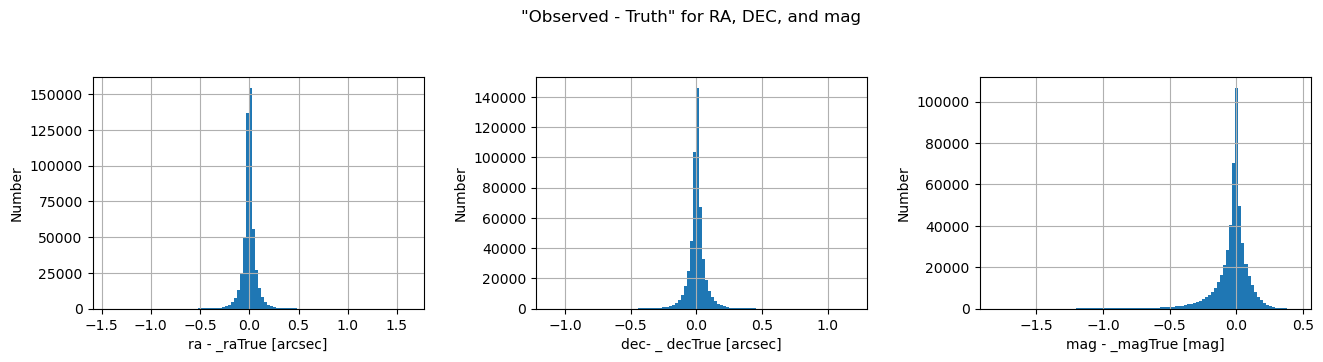

In [135]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
fig.tight_layout(pad=5.0)
fig.suptitle('"Observed - Truth" for RA, DEC, and mag')

ax[0].hist(3600.*(df['ra']-df['_raTrue']), bins=100)
ax[0].set_xlabel('ra - _raTrue [arcsec]')
ax[0].set_ylabel('Number')
ax[0].grid(True)

ax[1].hist(3600.*(df['decl']-df['_decTrue']), bins=100)
ax[1].set_xlabel('dec- _ decTrue [arcsec]')
ax[1].set_ylabel('Number')
ax[1].grid(True)

ax[2].hist(df['mag']-df['_magTrue'], bins=100)
ax[2].set_xlabel('mag - _magTrue [mag]')
ax[2].set_ylabel('Number')
ax[2].grid(True)

## DiaSource heatmap

Now let us plot the asteroid distribution as a function of RA and DEC, adding a red rectangle that shows the rough location of the **DP0.2** data set.   Note that there is a small but non-negligible sky overlap with DP0.2. We leave it to the reader to see if the DP0.3 dates of observation also overlap with those from DP0.2.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist2d(df['ra'], df['decl'], bins=100, norm='log')
plt.xlabel('ra (deg)')
plt.ylabel('declination (deg)')
plt.title('ra vs. dec')
ax.add_patch(Rectangle((50, -44), 25, 18,
                       edgecolor='red',
                       fill=False,
                       lw=2))
ax.annotate(
    'DP0.2',
    xy=(52, -37), xycoords='data',
    xytext=(0, 0), textcoords='offset points',
    color='red', size=8.0)

ax.grid()

Recall this plot is derived from the `DiaSource` table, and the RA,DEC coordinates change over time for each DiaSource.  Thus, coherent features seen in the above plot are due to observing strategy and not to unchanging positions of the DiaSources themselves.  For  instance, the two dense (yellow-green) squares near RA,DEC=(40,-5) and (150,+2) are due to two Deep Drilling Fields in the DP0.3 data -- i.e., fields observed much more than other fields nearby.

## DiaSource lightcurve

We can also plot this object's observed apparent magnitude vs. time (mid-point TAI, in days).  It appears to have a ~500 day periodicity, plus longer periods probably related to the fact that the the asteroid and our telescope are in different orbits.

In [ ]:
plt.scatter(df['midPointTai'], df['mag'])
plt.gca().invert_yaxis()
plt.xlabel('midPoint TAI (days)')
plt.ylabel('Magnitude')
plt.title("""ssObjectId 6793512588511170680:
             Magnitude vs. midPoint TAI""")
plt.grid(True)